In [1]:
import cv2

In [2]:
import matplotlib.pyplot as pil

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels=[]
file_name ='label.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [19]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 000001E091EE7550>

In [10]:
img = cv2.imread('image.jpg')

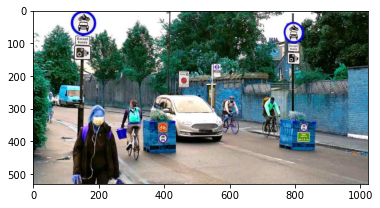

In [11]:
pil.imshow(img)

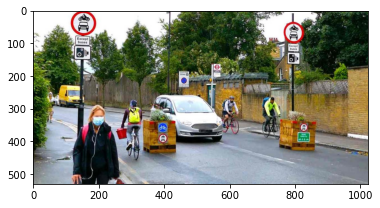

In [16]:
pil.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [20]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [25]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale,color=(0,255,0),thickness=3)

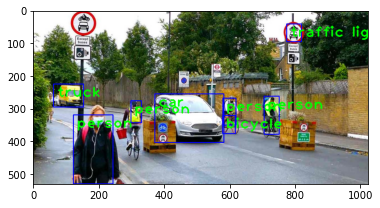

In [26]:
pil.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))